# 1. Imports

In [1]:
import os
import numpy as np

In [2]:
path = 'C:/Users/Asus/Documents/2023_2/Memoria/src'
os.chdir(path)

# 2. O Spectra

In [3]:
OdataPath = './Data/ORSpectra'
os.chdir(OdataPath)
spectraList = os.listdir()

In [4]:
model0 = 'G27500g300v10_R3.7'
f = open(model0)
data = f.readlines()
frequencies = {}
for row in data:
   frequencies[row.split()[0]] = []  

In [5]:
# formato: G27500g300v10_R3.7
import re
pattern = r'^G([0-9]+)g([0-9]+)[a-zA-Z0-9_]+_R([0-9]+).7'
cmp = re.compile(pattern)

temperature = []
g = []
v = []

intensities = frequencies

for modelName in spectraList:
	values = cmp.split(modelName)
	del values[0]; del values[-1]
 
	temperature.append(float(values[0]))
	g.append(float(values[1])/100)
	v.append(float(values[2]))
	
	f = open(modelName)
	data = f.readlines()

	for row in data:
		freq, intensity = row.split() 
		intensities[freq].append(float(intensity))


In [6]:
intensities['temperature'] = temperature
intensities['g'] = g
intensities['v'] = v

In [12]:
import pandas as pd
df = pd.DataFrame(intensities)
df.to_csv(path+'/Data/o_spectral_lines.csv',index=False)
df.head()

,4440.000,4440.100,4440.200,4440.300,4440.400,4440.500,4440.600,4440.700,4440.800,4440.900,...,4509.400,4509.500,4509.600,4509.700,4509.800,4509.900,4510.000,temperature,g,v
0,1.002,0.9988,0.9985,0.9982,0.9979,0.9977,0.9975,0.9974,0.9973,0.9972,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27500.0,3.0,102.0
1,1.002,0.9988,0.9985,0.9982,0.9980,0.9978,0.9976,0.9975,0.9973,0.9973,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27500.0,3.0,105.0
2,1.002,0.9987,0.9985,0.9982,0.9980,0.9978,0.9977,0.9975,0.9974,0.9973,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27500.0,3.0,108.0
3,1.002,0.9987,0.9985,0.9982,0.9980,0.9979,0.9977,0.9976,0.9975,0.9974,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27500.0,3.0,111.0
4,1.002,0.9987,0.9985,0.9982,0.9981,0.9979,0.9978,0.9976,0.9975,0.9975,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,27500.0,3.0,114.0


Text(0, 0.5, 'Intensidad')

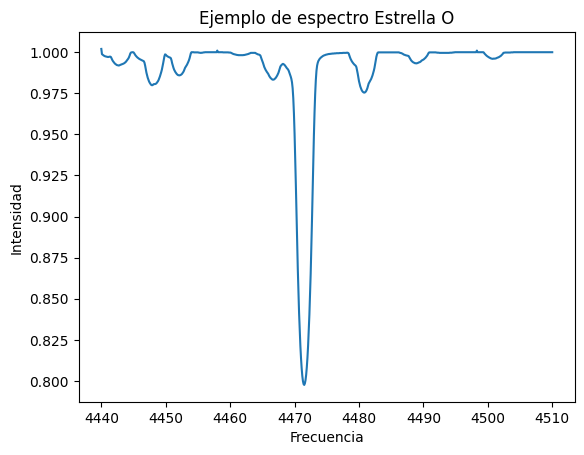

In [59]:
import matplotlib.pyplot as plt
target = ['temperature','g','v']
x = df.drop(target,axis = 1)
plt.plot(x.columns.map(float),x.iloc[0])
plt.title('Ejemplo de espectro Estrella O')
plt.xlabel('Frecuencia')
plt.ylabel('Intensidad')

# 3. B Spectra

In [13]:
OdataPath = './Data/BRSpectra'
os.chdir(path)
os.chdir(OdataPath)
spectraList = os.listdir()

In [14]:
model0 = 'BG15000g175v2_R3.7'
f = open(model0)
data = f.readlines()
frequencies = {}
for row in data:
   frequencies[row.split()[0]] = [] 

In [15]:
# formato: G27500g300v10_R3.7
import re
pattern = r'^BG([0-9]+)g([0-9]+)[a-zA-Z0-9_]+_R([0-9]+).7'
cmp = re.compile(pattern)

temperature = []
g = []
v = []

intensities = frequencies

for modelName in spectraList:
	values = cmp.split(modelName)
	del values[0]; del values[-1]
 
	temperature.append(float(values[0]))
	g.append(float(values[1])/100)
	v.append(float(values[2]))
	
	f = open(modelName)
	data = f.readlines()

	for row in data:
		freq, intensity = row.split() 
		intensities[freq].append(float(intensity))

In [16]:
intensities['temperature'] = temperature
intensities['g'] = g
intensities['v'] = v

In [17]:
import pandas as pd
df = pd.DataFrame(intensities)
df.to_csv(path+'/Data/b_spectral_lines.csv',index=False)
df.head()

,4440.000,4440.100,4440.200,4440.300,4440.400,4440.500,4440.600,4440.700,4440.800,4440.900,...,4509.400,4509.500,4509.600,4509.700,4509.800,4509.900,4510.000,temperature,g,v
0,0.9995,0.9997,0.9998,0.9998,0.9998,0.9996,0.9991,0.9987,0.9984,0.9981,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,15000.0,1.75,102.0
1,0.9995,0.9997,0.9998,0.9998,0.9997,0.9994,0.9990,0.9986,0.9983,0.9980,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,15000.0,1.75,105.0
2,0.9995,0.9997,0.9998,0.9998,0.9997,0.9992,0.9988,0.9985,0.9982,0.9980,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,15000.0,1.75,108.0
3,0.9995,0.9997,0.9998,0.9997,0.9995,0.9991,0.9987,0.9984,0.9982,0.9980,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,15000.0,1.75,111.0
4,0.9995,0.9997,0.9998,0.9997,0.9993,0.9989,0.9986,0.9984,0.9982,0.9980,...,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,0.9999,15000.0,1.75,114.0


Text(0, 0.5, 'Intensidad')

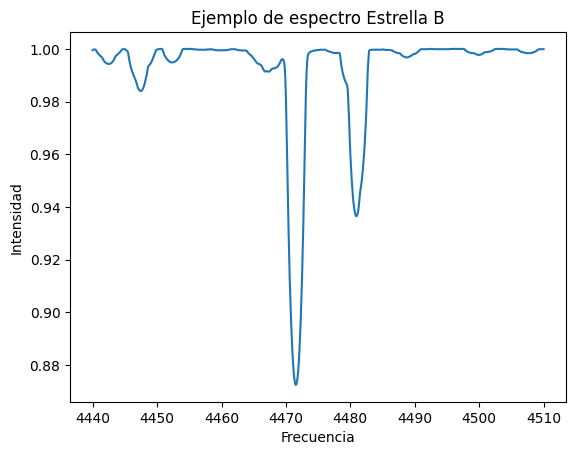

In [18]:
import matplotlib.pyplot as plt
target = ['temperature','g','v']
x = df.drop(target,axis = 1)
plt.plot(x.columns.map(float),x.iloc[0])
plt.title('Ejemplo de espectro Estrella B')
plt.xlabel('Frecuencia')
plt.ylabel('Intensidad')

# 4. Real Spectra

In [19]:
OdataPath = './Data/RealSpectra'
os.chdir(path)
os.chdir(OdataPath)
spectraList = os.listdir()

In [20]:
# formato: points amount: 701
import math
import re
pattern = r'^HD[0-9]+_Be_T([0-9]+)g([0-9]+)v([0-9]+).txt'
cmp = re.compile(pattern)

temperature = []
g = []
v = []

num_points = 701
freq_lower_limit=4440

intensities = []
frequencies = []

for starName in spectraList:
	values = cmp.split(starName)
	del values[0]; del values[-1]
 
	temperature.append(float(values[0]))
	g.append(float(values[1])/100)
	v.append(float(values[2]))
	
	f = open(starName)
	data = f.readlines()

	fList = []
	iList = []
	for i, row in enumerate(data):
		freq, intensity = row.split()
		if float(freq) >= 4440.0 and float(freq) <= 4510.0:
			fList.append(float(freq))
			iList.append(float(intensity))

	diff = abs(num_points-len(iList))
	f = len(iList)/diff
	for i in range(diff-1,-1,-1):
		fList.pop(math.floor(i*f))
		iList.pop(math.floor(i*f))

	intensities.append(iList)
	frequencies.append(fList)

In [21]:
intensities_dict = {}
intensities_dict['temperature'] = temperature
intensities_dict['g'] = g
intensities_dict['v'] = v

intensities = np.array(intensities).T
for i in range(num_points):
	intensities_dict[i] = intensities[i]

In [22]:
import pandas as pd
df = pd.DataFrame(intensities_dict)
df.to_csv(path+'/Data/observed_spectral_lines.csv',index=False)
df.head()

,temperature,g,v,0,1,2,3,4,5,6,...,691,692,693,694,695,696,697,698,699,700
0,15000.0,3.40,68.0,1.006207,1.011334,1.011063,0.989410,0.981313,0.985582,0.985127,...,1.018356,1.024484,1.009690,0.985338,0.977393,0.982267,0.971074,0.975011,0.990734,0.986264
1,18400.0,3.50,40.0,1.002340,1.001984,1.012148,0.999410,0.973238,0.962835,1.012594,...,0.987626,0.984032,0.989725,0.997450,0.992372,0.997195,0.995904,0.987595,0.997299,1.011554
2,30000.0,3.53,150.0,1.001155,1.003706,1.011905,1.009815,1.005639,0.995491,1.000779,...,1.039159,1.036119,1.027644,1.010663,1.017373,1.025097,1.016319,1.008946,1.005762,1.005966
3,22000.0,3.90,280.0,0.981472,1.020042,1.031538,1.019619,1.007550,1.032893,1.026910,...,0.992576,0.999371,1.005173,1.003935,1.007474,1.014422,1.001411,0.977761,0.975091,0.986133
4,24500.0,3.40,215.0,0.991949,1.005975,1.021044,1.020442,1.021008,1.024178,1.026549,...,0.986105,1.003851,0.995326,0.984745,0.984206,0.983832,0.983207,0.988783,0.994888,0.994611
